In [1]:
import pandas as pd

df = pd.read_csv("churn_dataset.csv")

# Exibindo as 5 primeiras linhas para ver a estrutura
print(df.head())

# Descobrir como o churn ta salvo no arquivo
print(df.columns)

   idade  tempo_contrato  uso_mensal  suporte_chamados  cancelou
0     18              14           1                10         1
1     53               1          11                 8         0
2     48              13          20                 0         0
3     20              17          22                 0         0
4     65               3          30                 4         1
Index(['idade', 'tempo_contrato', 'uso_mensal', 'suporte_chamados',
       'cancelou'],
      dtype='object')


In [2]:
from sklearn.model_selection import train_test_split

# Separar X e y
X = df.drop("cancelou", axis=1)
y = df["cancelou"]

# Converter variáveis categóricas se houver (One-hot encoding)
X = pd.get_dummies(X)

# Dividir em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lista para armazenar as acurácias
accuracies = []

# Loop para testar diferentes valores de k
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}: Acurácia = {acc:.4f}")

k=1: Acurácia = 0.8000
k=2: Acurácia = 0.7889
k=3: Acurácia = 0.7556
k=4: Acurácia = 0.7333
k=5: Acurácia = 0.7556
k=6: Acurácia = 0.7333
k=7: Acurácia = 0.7444
k=8: Acurácia = 0.7556
k=9: Acurácia = 0.7667
k=10: Acurácia = 0.7667
k=11: Acurácia = 0.7667
k=12: Acurácia = 0.7667
k=13: Acurácia = 0.7667
k=14: Acurácia = 0.7556
k=15: Acurácia = 0.7778
k=16: Acurácia = 0.7667
k=17: Acurácia = 0.7667
k=18: Acurácia = 0.7556
k=19: Acurácia = 0.7667
k=20: Acurácia = 0.7667


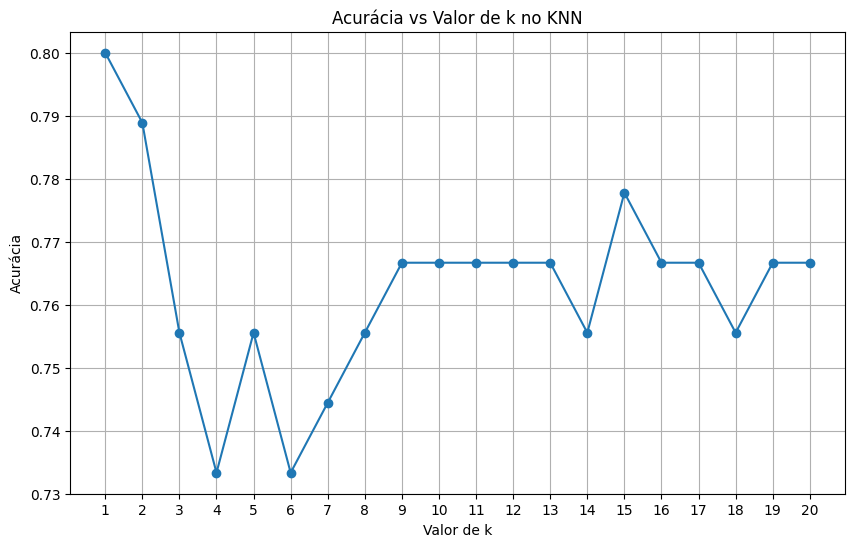

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.title("Acurácia vs Valor de k no KNN")
plt.xlabel("Valor de k")
plt.ylabel("Acurácia")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Questões para reflexão

- O  desempenho foi consistente em todos os valores de k ou variou bastante?

- Qual foi o melhor k encontrado no gráfico?

- Se você tivesse que implantar esse modelo em produção, escolheria o k que deu a melhor acurácia ou outro valor? Por quê?